In [1]:
### 요구사항 1. 알고리즘 3개 정도 - randomforest, decisionTree, LogisticReression
###          2. 평가지표? 2진분류입니다 ^^ - accuracy_score, precision_score, recall_score
###          3.                              f1_score, confusion_matrix, roc_auc_score

# 예 from sklearn.metrics import 

In [2]:
### 전처리 :: 문자 (X), 결측치 (X)
### target --> outcome 


### describe 및 info 

* Pregnancies: 임신횟수


* Glucose: 포도당 부하 검사 수치


* BloodPressure: 혈압


* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)


* Insulin: 혈청 인슐린


* BMI: 체질량지수(체중(kg)/키(m))^2)


* DiabetesPedigreeFunction: 당뇨 내력 가중치값


* Age: 나이


* Outcome: 클래스 결정 값(0또는 1)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

diabetes_df = pd.read_csv('./diabetes.csv')

In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [26]:
def get_con_index(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    p_score = precision_score(y_test,pred)
    r_score = recall_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('혼동행렬 confusion matrix')
    print(confusion)
    print('accuracy :{0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1:{3:.4f}, roc_auc:{4:.4f}'.format(accuracy, p_score, r_score, f1, roc_auc))

In [10]:
y = diabetes_df.Outcome
X = diabetes_df.drop(['Outcome'], axis=1)

In [27]:
import warnings
warnings.filterwarnings('ignore')

# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

# fitting 시작

# from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred_lr = lr_clf.predict(X_test)
print('## 로지스틱회귀 ##\n')
get_con_index(y_test,pred_lr)


# from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred_dt = dt_clf.predict(X_test)
print('\n## 의사결정나무 ##\n')
get_con_index(y_test,pred_dt)


# from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
pred_rf = rf_clf.predict(X_test)

print('\n## 랜덤포레스트 ##\n')
get_con_index(y_test,pred_rf)

## 로지스틱회귀 ##

혼동행렬 confusion matrix
[[96  4]
 [23 31]]
accuracy :0.8247, precision: 0.8857, recall: 0.5741, f1:0.6966, roc_auc:0.7670

## 의사결정나무 ##

혼동행렬 confusion matrix
[[84 16]
 [21 33]]
accuracy :0.7597, precision: 0.6735, recall: 0.6111, f1:0.6408, roc_auc:0.7256

## 랜덤포레스트 ##

혼동행렬 confusion matrix
[[92  8]
 [22 32]]
accuracy :0.8052, precision: 0.8000, recall: 0.5926, f1:0.6809, roc_auc:0.7563


In [12]:
# matplotlib의 학습 이후에 코딩을 실습시 확인해주셔요 ^^

def p_r_curve_plot(y_test, pred_proba):
    # threshold ndarray로 가져와보고 
    # 위의 threshold에 따른 정밀도, 재현율의 ndarray를 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # X축 = threshold
    # y축은 precision(점선) 및 recall(주황선) 설정
    # 각 곡선을 중첩되게 graph화
    plt.figure(figsize=(8,6))
    threshold_boudary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boudary], linestyle='--', label='precison')
    plt.plot(thresholds, recalls[0:threshold_boudary], label='recall')
    
    # threshold 값 x 축의 scale을 0,1으로 scaling
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.10),2))
    
    # X축, y축 label 및 legend 추가
    # grid도 추가
    plt.xlabel('Threshold_value')
    plt.ylabel('Precision and Recall')
    plt.legend()
    plt.grid()
    plt.show() 

In [13]:
lr_clf.predict(X_test)[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

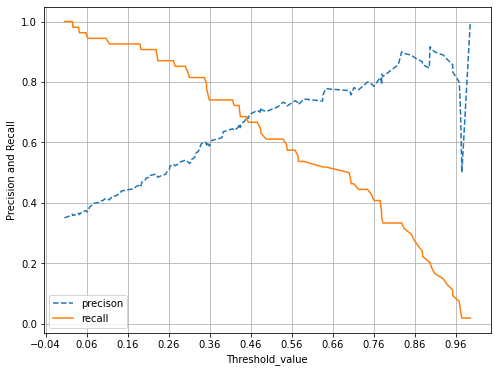

In [14]:
pred_proba = lr_clf.predict_proba(X_test)[:,1]
p_r_curve_plot(y_test,pred_proba)

In [15]:
test_array = np.arange(1,11)
test_array.reshape(-1,2)[:,:]

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [16]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


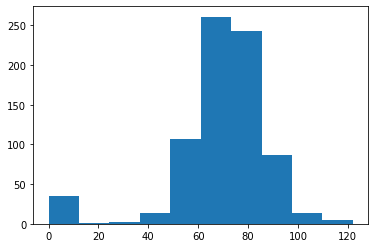

In [17]:
# 혈압에 0이 나온다???

plt.hist(diabetes_df.BloodPressure)
plt.show()

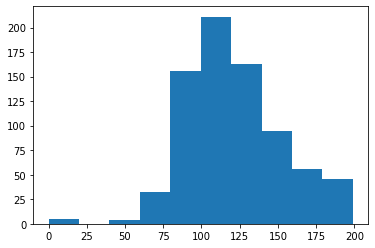

In [18]:
# Glucose에 0이 나온다???

plt.hist(diabetes_df.Glucose)
plt.show()

In [19]:
# 0값이 있는 비율을 계산하여 확인해보자.
# Glucose	BloodPressure	SkinThickness	Insulin	BMI

zero_ftrs = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

total_cnt = len(diabetes_df)

for ftr in zero_ftrs:
    z_cnt = diabetes_df[diabetes_df[ftr]==0][ftr].count()
    print('{0}의 zero의 수는 {1}, 퍼센트 비율은{2:.2f} %'.format(ftr,z_cnt,(z_cnt/total_cnt)*100))

Glucose의 zero의 수는 5, 퍼센트 비율은0.65 %
BloodPressure의 zero의 수는 35, 퍼센트 비율은4.56 %
SkinThickness의 zero의 수는 227, 퍼센트 비율은29.56 %
Insulin의 zero의 수는 374, 퍼센트 비율은48.70 %
BMI의 zero의 수는 11, 퍼센트 비율은1.43 %


In [20]:
mean_zero_ftrs = diabetes_df[zero_ftrs].mean()
diabetes_df[zero_ftrs] = diabetes_df[zero_ftrs].replace(0,mean_zero_ftrs)

In [21]:
X_scaled = diabetes_df.drop(['Outcome'], axis=1)
y_scaled = diabetes_df['Outcome']

In [22]:
# 스케일링된 데이터를 통해 train_test_split을 함

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, stratify=y_scaled)

print('X_train의 shape:', X_train.shape)
print('X_test의 shape:', X_test.shape)
print('y_train의 shape:', y_train.shape)
print('y_test의 shape:', y_test.shape)

X_train의 shape: (614, 8)
X_test의 shape: (154, 8)
y_train의 shape: (614,)
y_test의 shape: (154,)


In [23]:
# fitting 시작

# from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred_lr = lr_clf.predict(X_test)
print('## 로지스틱회귀 ##\n')
get_con_index(y_test,pred_lr)


# from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred_dt = dt_clf.predict(X_test)
print('\n## 의사결정나무 ##\n')
get_con_index(y_test,pred_dt)


# from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
pred_rf = rf_clf.predict(X_test)

print('\n## 랜덤포레스트 ##\n')
get_con_index(y_test,pred_rf)

## 로지스틱회귀 ##

혼동행렬 confusion matrix
[[84 16]
 [19 35]]
accuracy :0.7727, precision: 0.6863, recall: 0.6481, f1:0.6667,roc_auc:0.7441

## 의사결정나무 ##

혼동행렬 confusion matrix
[[73 27]
 [22 32]]
accuracy :0.6818, precision: 0.5424, recall: 0.5926, f1:0.5664,roc_auc:0.6613

## 랜덤포레스트 ##

혼동행렬 confusion matrix
[[84 16]
 [16 38]]
accuracy :0.7922, precision: 0.7037, recall: 0.7037, f1:0.7037,roc_auc:0.7719


In [24]:
# end of file